# Introduction

TODO: Add short intro to the notebook

# Set up the environment

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Set charts style

In [3]:
# TODO

# Load the data

In [4]:
# The European Commision data
ec_data = pd.read_csv('data/theeuropeancommission_preprocessed.csv')
ec_data.head()

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,European Commission authorises second safe and...,2021-01-06,Press Release,"Today, the European Commission has granted a c...",today european commission grant conditional ma...,european commission authorise second safe effe...,0
1,Statement by President von der Leyen on the re...,2021-01-07,Statement,What happened in Washington yesterday is as ...,happen washington yesterday appalling outrageo...,statement president von der leyen recent devel...,0
2,Commission proposes to purchase up to 300 mill...,2021-01-08,Press Release,The European Commission today proposed to the ...,european commission today propose EU member st...,commission propose purchase 300 million additi...,0
3,Speech by President von der Leyen at the One P...,2021-01-11,Speech,"Merci Monsieur le Président.\nCher Emmanuel,\n...",merci monsieur le président cher emmanuel deli...,speech president von der leyen one planet summit,0
4,Coronavirus: Commission concludes exploratory ...,2021-01-12,Press Release,"Today, the European Commission concluded explo...",today european commission conclude exploratory...,coronavirus commission conclude exploratory ta...,0


In [5]:
# The White House data
wh_data_p1 = pd.read_csv('data/thewhitehouse_preprocessed_p1.csv')
wh_data_p2 = pd.read_csv('data/thewhitehouse_preprocessed_p2.csv')
wh_data = pd.concat([wh_data_p1, wh_data_p2], ignore_index=True)
wh_data.head()

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,Fact Sheet: President-elect Biden Outlines COV...,2021-01-15,Statement,Effectively and equitably vaccinating the U.S....,effectively equitably vaccinate US population ...,fact sheet president elect biden outlines covi...,0
1,Fact Sheet: List of Agency Actions for Review,2021-01-20,Statement,"Actions Address the COVID-19 Pandemic, Provide...",actions address covid19 pandemic provide econo...,fact sheet list agency actions review,0
2,Fact Sheet: President Biden Sends Immigration ...,2021-01-20,Statement,The U.S. Citizenship Act of 2021 establishes a...,US citizenship act 2021 establish new system r...,fact sheet president biden sends immigration b...,0
3,"A Letter to Dr. Eric S. Lander, the President’...",2021-01-20,Statement,"On January 15, 2021, then-President-Elect Bide...",january 15 2021 president elect biden send fol...,letter dr eric lander president science adviso...,0
4,Paris Climate Agreement,2021-01-20,Statement,ACCEPTANCE ON BEHALF OF THE UNITED STATES OF A...,acceptance ON BEHALF UNITED STATES AMERICA jos...,paris climate agreement,0


# Data Exploration

## Total Count by Month

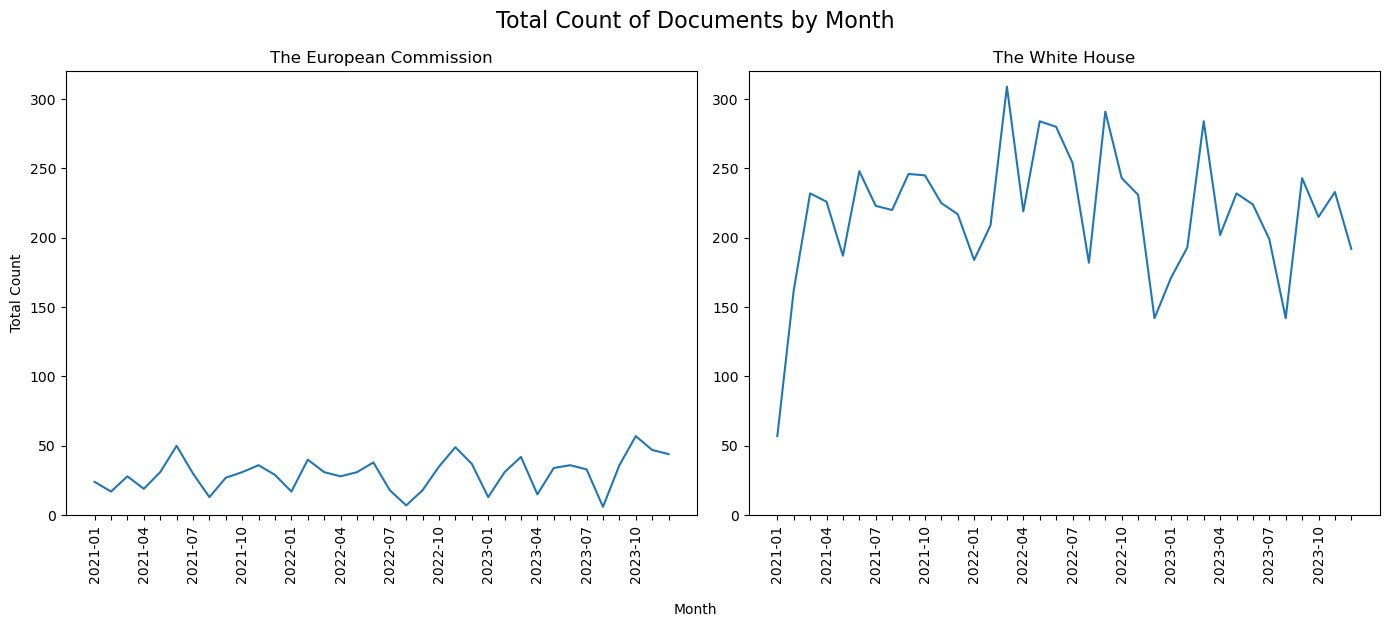

In [6]:
# Convert 'Date' column to datetime format
ec_data['Date'] = pd.to_datetime(ec_data['Date'])
wh_data['Date'] = pd.to_datetime(wh_data['Date'])

# Group by month and count the occurrences for both datasets
counts_by_month_ec = ec_data.groupby(ec_data['Date'].dt.to_period('M')).size()
counts_by_month_wh = wh_data.groupby(wh_data['Date'].dt.to_period('M')).size()

# Convert 'Period' objects to strings
counts_by_month_ec.index = counts_by_month_ec.index.strftime('%Y-%m')
counts_by_month_wh.index = counts_by_month_wh.index.strftime('%Y-%m')

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for European Commission
axs[0].plot(counts_by_month_ec.index, counts_by_month_ec)
axs[0].set_title('The European Commission')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 320)

# Plot for White House
axs[1].plot(counts_by_month_wh.index, counts_by_month_wh)
axs[1].set_title('The White House')

axs[1].set_ylim(0, 320)

# Rotate x-axis labels to avoid overlapping
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')

# Add a common title
plt.suptitle('Total Count of Documents by Month', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Count of documents by Category

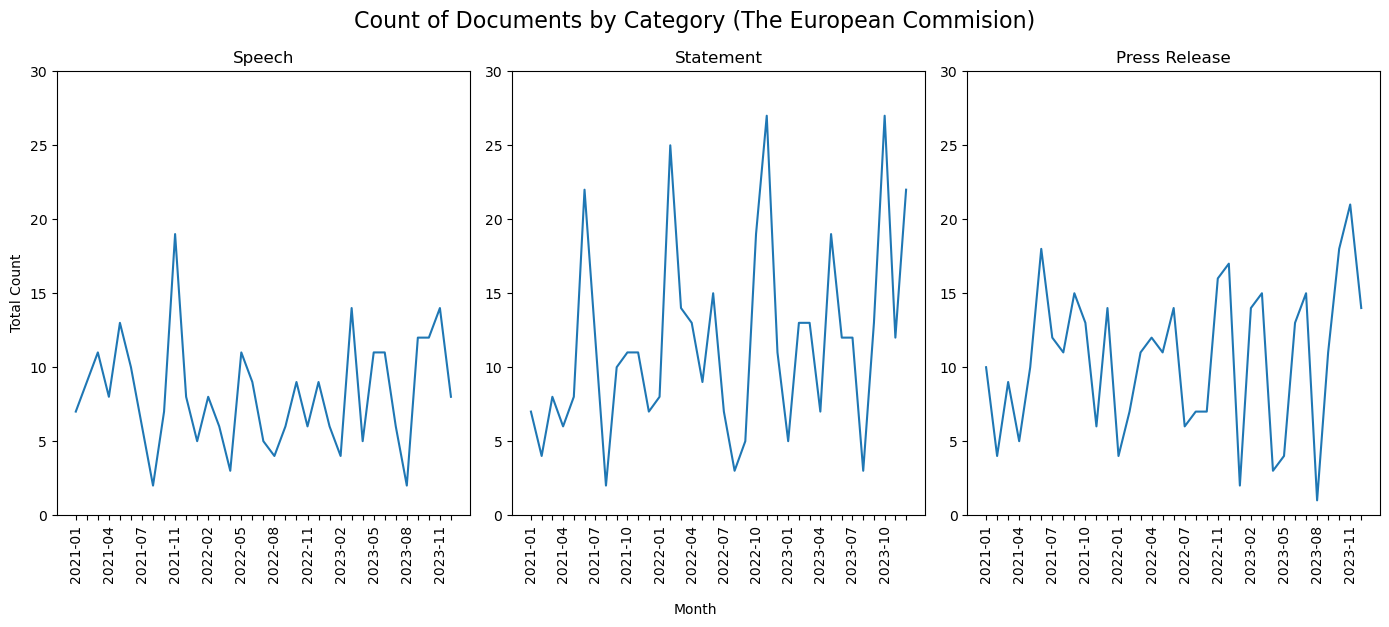

In [7]:
# Group by month and count the occurrences
ec_speech = ec_data[ec_data.Category == 'Speech']
counts_by_month_ec_speech = ec_speech.groupby(ec_speech['Date'].dt.to_period('M')).size()
counts_by_month_ec_speech.index = counts_by_month_ec_speech.index.strftime('%Y-%m')

ec_statement = ec_data[ec_data.Category == 'Statement']
counts_by_month_ec_statement = ec_statement.groupby(ec_statement['Date'].dt.to_period('M')).size()
counts_by_month_ec_statement.index = counts_by_month_ec_statement.index.strftime('%Y-%m')

ec_pr = ec_data[ec_data.Category == 'Press Release']
counts_by_month_ec_pr = ec_pr.groupby(ec_pr['Date'].dt.to_period('M')).size()
counts_by_month_ec_pr.index = counts_by_month_ec_pr.index.strftime('%Y-%m')


# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_ec_speech.index, counts_by_month_ec_speech)
axs[0].set_title('Speech')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 30)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_ec_statement.index, counts_by_month_ec_statement)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 30)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_ec_pr.index, counts_by_month_ec_pr)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 30)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

            
# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')


# Add a common title
plt.suptitle('Count of Documents by Category (The European Commision)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

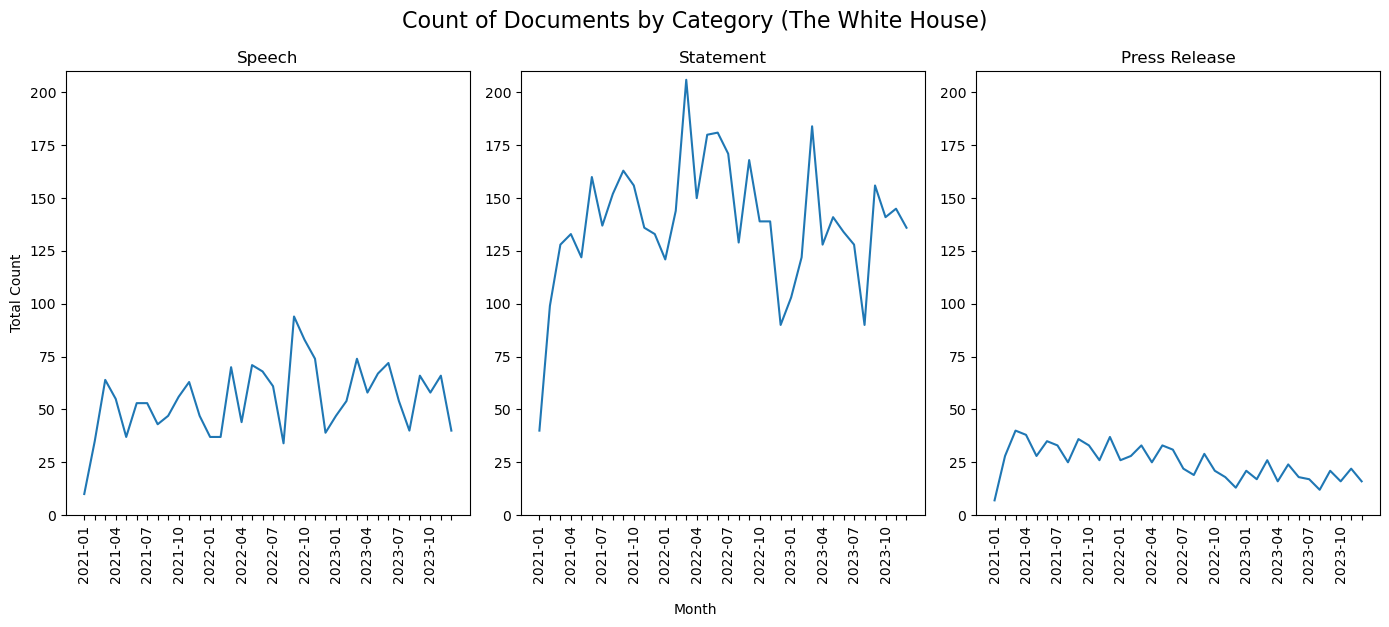

In [8]:
# Group by month and count the occurrences
wh_speech = wh_data[wh_data.Category == 'Speech']
counts_by_month_wh_speech = wh_speech.groupby(wh_speech['Date'].dt.to_period('M')).size()
counts_by_month_wh_speech.index = counts_by_month_wh_speech.index.strftime('%Y-%m')

wh_statement = wh_data[wh_data.Category == 'Statement']
counts_by_month_wh_statement = wh_statement.groupby(wh_statement['Date'].dt.to_period('M')).size()
counts_by_month_wh_statement.index = counts_by_month_wh_statement.index.strftime('%Y-%m')

wh_pr = wh_data[wh_data.Category == 'Press Release']
counts_by_month_wh_pr = wh_pr.groupby(wh_pr['Date'].dt.to_period('M')).size()
counts_by_month_wh_pr.index = counts_by_month_wh_pr.index.strftime('%Y-%m')


# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_wh_speech.index, counts_by_month_wh_speech)
axs[0].set_title('Speech')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 210)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_wh_statement.index, counts_by_month_wh_statement)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 210)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_wh_pr.index, counts_by_month_wh_pr)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 210)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Count of Documents by Category (The White House)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Share of Documents Mentioning Ukraine by Month

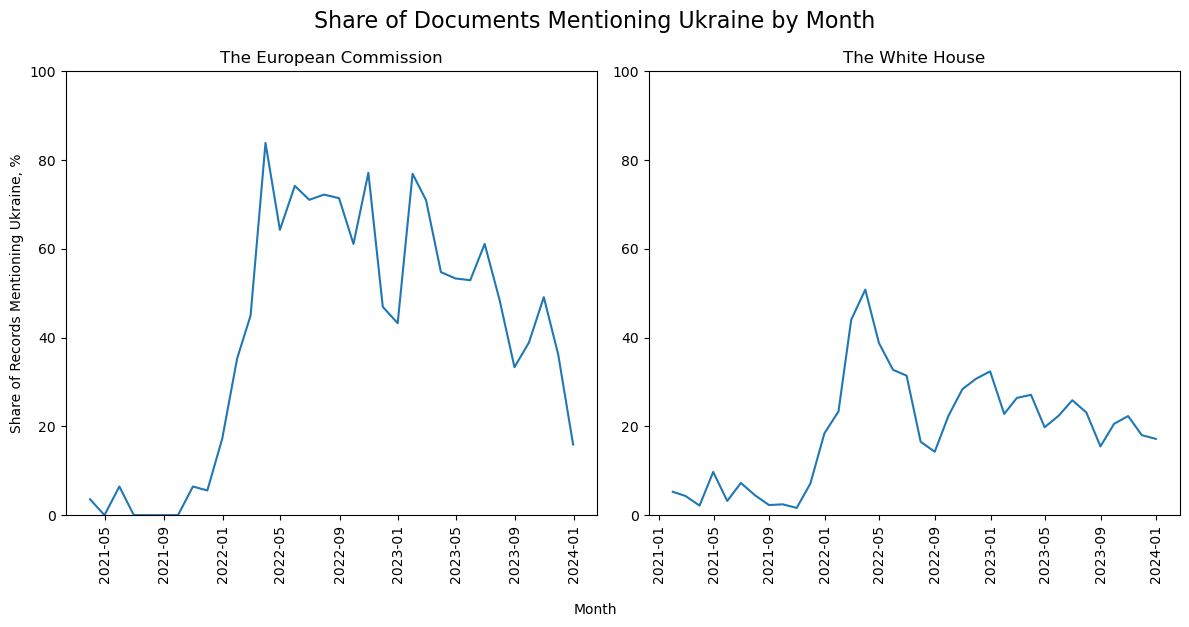

In [12]:
## The European Commission
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month_ec = ec_data.resample('M', on='Date').size()
mentions_by_month_ec = ec_data[ec_data['Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month_ec = mentions_by_month_ec / counts_by_month_ec


## The White GHouse
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month_wh = wh_data.resample('M', on='Date').size()
mentions_by_month_wh = wh_data[wh_data['Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month_wh = mentions_by_month_wh / counts_by_month_wh


## Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for The European Commission
axs[0].plot(share_mentions_by_month_ec.index, share_mentions_by_month_ec*100)
axs[0].set_title('The European Commission')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 100)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels


# Plot for The White House
axs[1].plot(share_mentions_by_month_wh.index, share_mentions_by_month_wh*100)
axs[1].set_title('The White House')
axs[1].set_ylim(0, 100)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')

# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Share of Documents Mentioning Ukraine by Month and Category

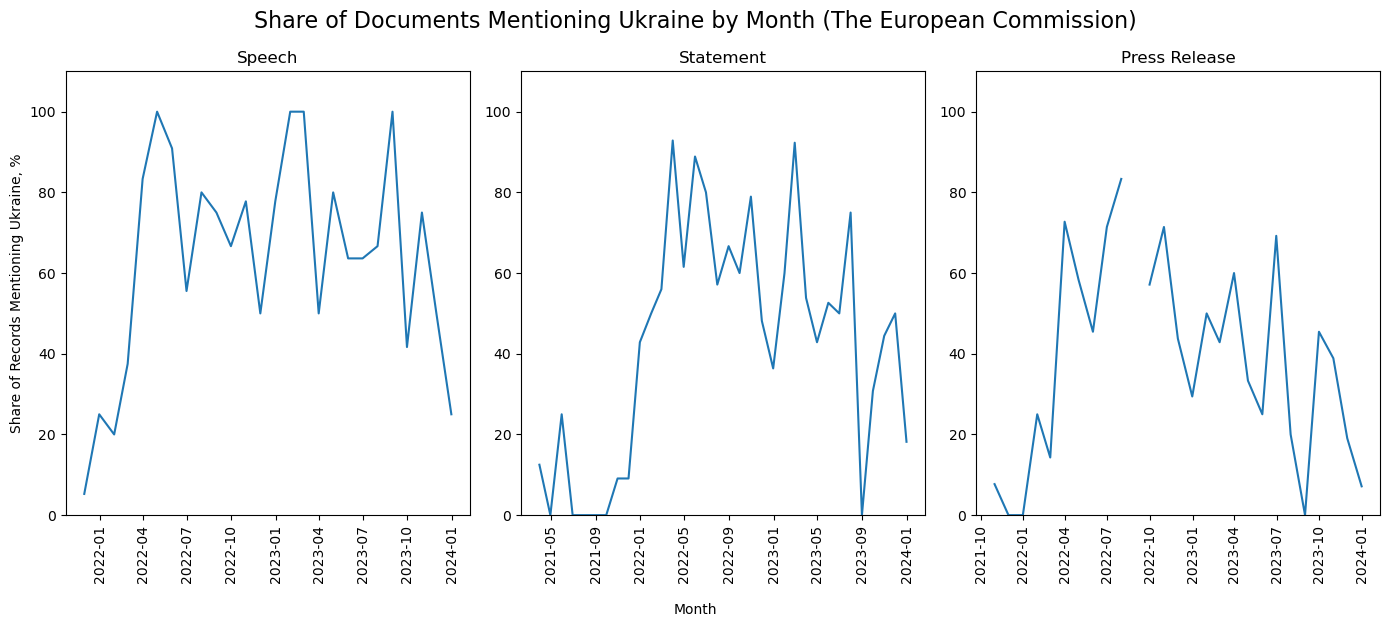

In [38]:
## The European Commission

counts_by_month_ec_speech = ec_speech.resample('M', on='Date').size()
mentions_by_month_ec_speech = ec_speech[ec_speech['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_ec_speech = mentions_by_month_ec_speech / counts_by_month_ec_speech

counts_by_month_ec_statement = ec_statement.resample('M', on='Date').size()
mentions_by_month_ec_statement = ec_statement[ec_statement['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_ec_statement = mentions_by_month_ec_statement / counts_by_month_ec_statement

counts_by_month_ec_pr = ec_pr.resample('M', on='Date').size()
mentions_by_month_ec_pr = ec_pr[ec_pr['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_ec_pr = mentions_by_month_ec_pr / counts_by_month_ec_pr

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(share_mentions_by_month_ec_speech.index, share_mentions_by_month_ec_speech*100)
axs[0].set_title('Speech')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 110)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(share_mentions_by_month_ec_statement.index, share_mentions_by_month_ec_statement*100)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 110)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(share_mentions_by_month_ec_pr.index, share_mentions_by_month_ec_pr*100)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 110)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
#for ax in axs:
#    for i, label in enumerate(ax.xaxis.get_ticklabels()):
#        if i % 3 != 0:
#            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month (The European Commission)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

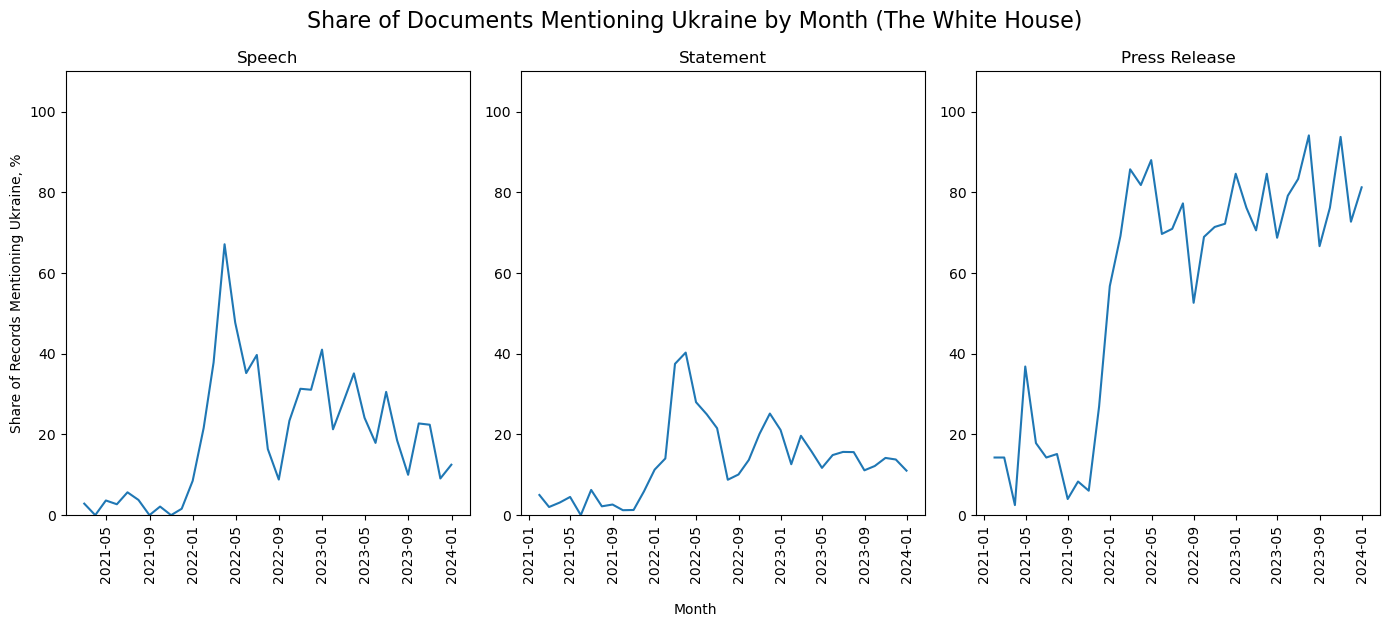

In [39]:
## The White House

counts_by_month_wh_speech = wh_speech.resample('M', on='Date').size()
mentions_by_month_wh_speech = wh_speech[wh_speech['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_wh_speech = mentions_by_month_wh_speech / counts_by_month_wh_speech

counts_by_month_wh_statement = wh_statement.resample('M', on='Date').size()
mentions_by_month_wh_statement = wh_statement[wh_statement['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_wh_statement = mentions_by_month_wh_statement / counts_by_month_wh_statement

counts_by_month_wh_pr = wh_pr.resample('M', on='Date').size()
mentions_by_month_wh_pr = wh_pr[wh_pr['Ukraine'] == 1].resample('M', on='Date').size()
share_mentions_by_month_wh_pr = mentions_by_month_wh_pr / counts_by_month_wh_pr

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(share_mentions_by_month_wh_speech.index, share_mentions_by_month_wh_speech*100)
axs[0].set_title('Speech')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 110)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(share_mentions_by_month_wh_statement.index, share_mentions_by_month_wh_statement*100)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 110)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(share_mentions_by_month_wh_pr.index, share_mentions_by_month_wh_pr*100)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 110)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
#for ax in axs:
#    for i, label in enumerate(ax.xaxis.get_ticklabels()):
#        if i % 3 != 0:
#            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month (The White House)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# In the part below there are other charts I did in the beginning (in case we'll need to use any of them)

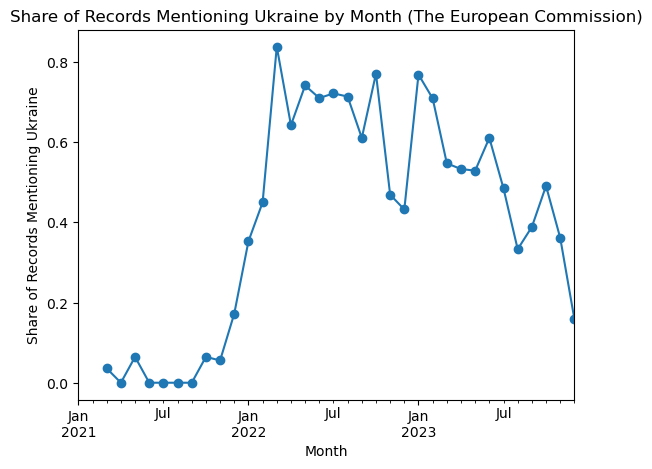

In [13]:
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month_ec = ec_data.resample('M', on='Date').size()
mentions_by_month_ec = ec_data[ec_data['Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month_ec = mentions_by_month_ec / counts_by_month_ec

# Plot the share of mentions by month
share_mentions_by_month_ec.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Share of Records Mentioning Ukraine')
plt.title('Share of Records Mentioning Ukraine by Month (The European Commission)')

# Show plot
plt.show()

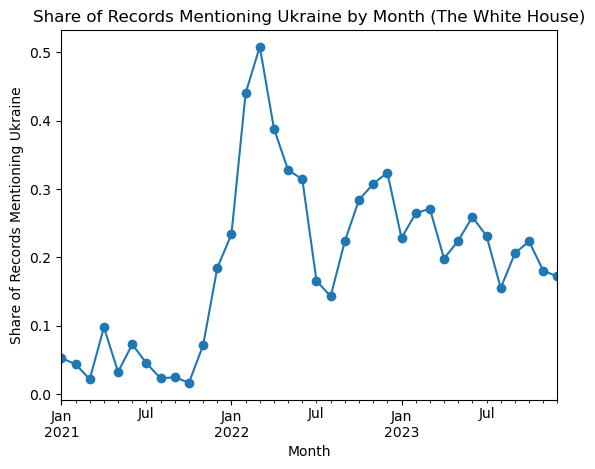

In [14]:
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month_wh = wh_data.resample('M', on='Date').size()
mentions_by_month_wh = wh_data[wh_data['Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month_wh = mentions_by_month_wh / counts_by_month_wh

# Plot the share of mentions by month
share_mentions_by_month_wh.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Share of Records Mentioning Ukraine')
plt.title('Share of Records Mentioning Ukraine by Month (The White House)')

# Show plot
plt.show()

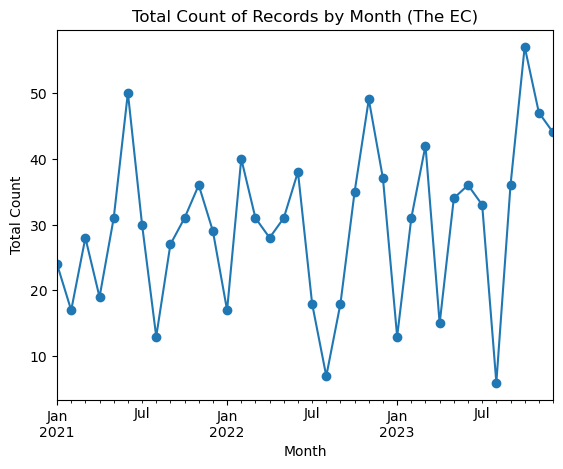

In [15]:
# The European Commision - I left it for now if case we want to show the EC and WH charts separately

# Convert 'Date' column to datetime format
ec_data['Date'] = pd.to_datetime(ec_data['Date'])

# Group by month and count the occurrences
counts_by_month = ec_data.groupby(ec_data['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month (The EC)')

# Show plot
plt.show()

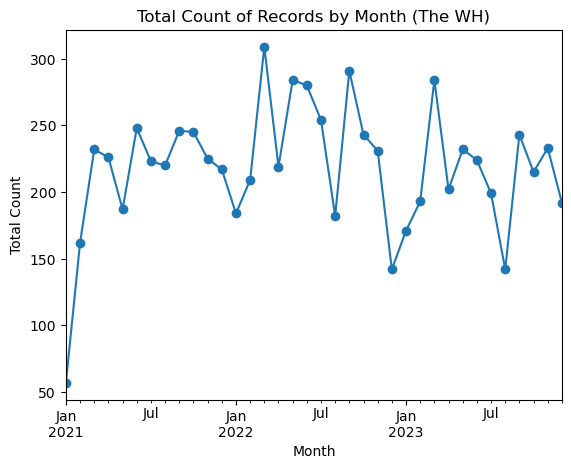

In [16]:
# The White House

# Convert 'Date' column to datetime format
wh_data['Date'] = pd.to_datetime(wh_data['Date'])

# Group by month and count the occurrences
counts_by_month = wh_data.groupby(wh_data['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month (The WH)')

# Show plot
plt.show()

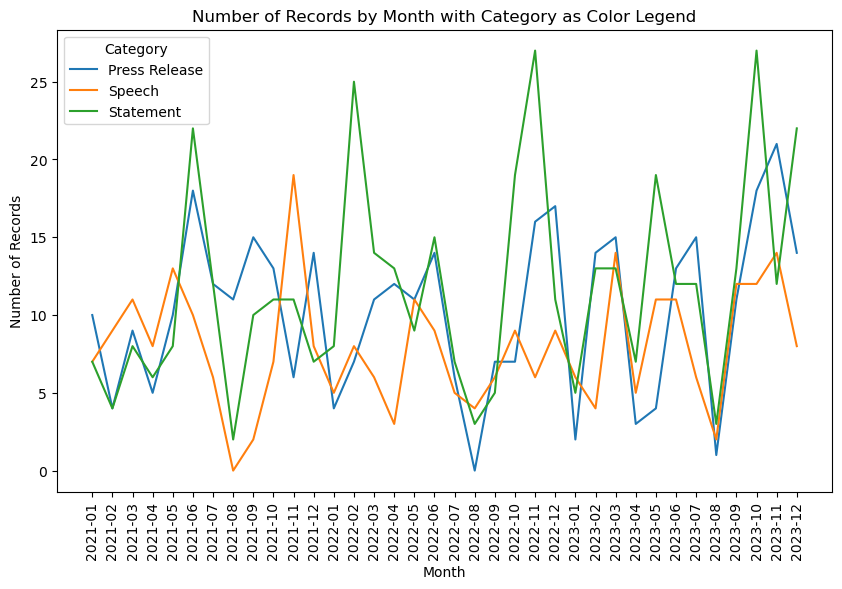

In [17]:
import seaborn as sns

# Extract month from the 'date' column and convert to string format
ec_data['Month'] = ec_data['Date'].dt.strftime('%Y-%m')

# Ensure 'Category' column is categorical
ec_data['Category'] = ec_data['Category'].astype('category')

# Group by month and category and calculate the count of records
records_by_month_category = ec_data.groupby(['Month', 'Category']).size().reset_index(name='count')

# Plot the number of records by time with category as color legend
plt.figure(figsize=(10, 6))
sns.lineplot(data=records_by_month_category, x='Month', y='count', hue='Category')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.title('Number of Records by Month with Category as Color Legend')
plt.tick_params(axis='x', rotation=90)  # Rotate x-axis labels


# Show legend
plt.legend(title='Category')

# Show plot
plt.show()